1- Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn import metrics

from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB


from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, GradientBoostingClassifier,VotingClassifier

from sklearn.metrics import confusion_matrix,classification_report,recall_score,accuracy_score,precision_score

from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

# 2- Data Exploration

In [2]:
traindf = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
testdf = pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")

In [3]:
traindf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
traindf.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [5]:
traindf.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [6]:
# use balanced dataset for analysis
balanceddf = pd.concat((traindf[traindf["TARGET"]==1], traindf[traindf["TARGET"]==0].sample(n=traindf[traindf["TARGET"]==1].shape[0])))

In [8]:
def fillna_df(df):
    for column in df.select_dtypes("object").columns:
        df[column] = df[column].fillna(df[column].mode())
        
    for column in df.select_dtypes("number").columns:
        df[column] = df[column].fillna(df[column].median())
    return df

In [9]:
traindf.isnull().sum().sort_values(ascending=False)

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
                             ...  
NAME_HOUSING_TYPE                0
NAME_FAMILY_STATUS               0
NAME_EDUCATION_TYPE              0
NAME_INCOME_TYPE                 0
SK_ID_CURR                       0
Length: 122, dtype: int64

In [10]:
testdf.isnull().sum().sort_values(ascending=False)

COMMONAREA_AVG              33495
COMMONAREA_MODE             33495
COMMONAREA_MEDI             33495
NONLIVINGAPARTMENTS_AVG     33347
NONLIVINGAPARTMENTS_MODE    33347
                            ...  
NAME_HOUSING_TYPE               0
NAME_FAMILY_STATUS              0
NAME_EDUCATION_TYPE             0
NAME_INCOME_TYPE                0
SK_ID_CURR                      0
Length: 121, dtype: int64

# 3- EDA & Visualization

Histograms of dataset


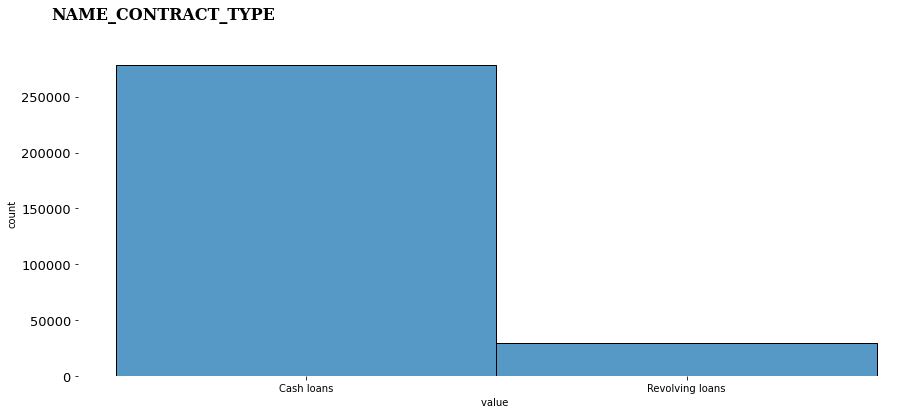

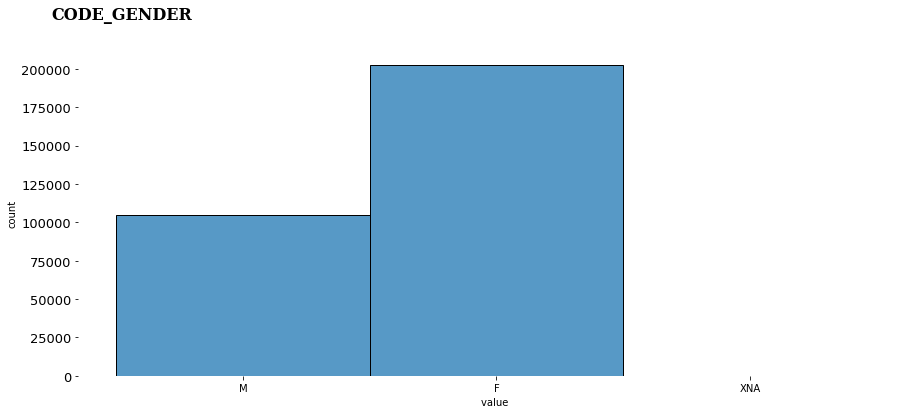

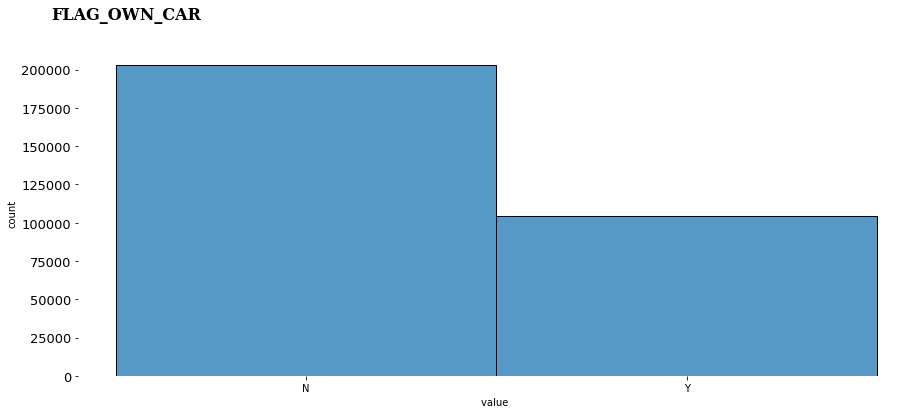

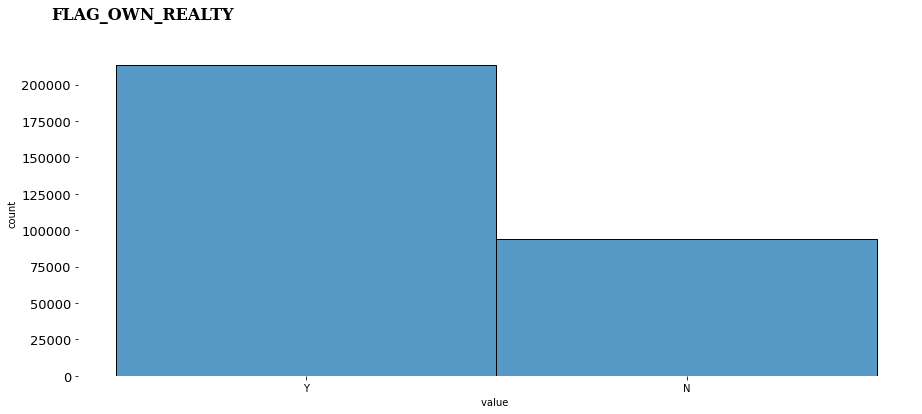

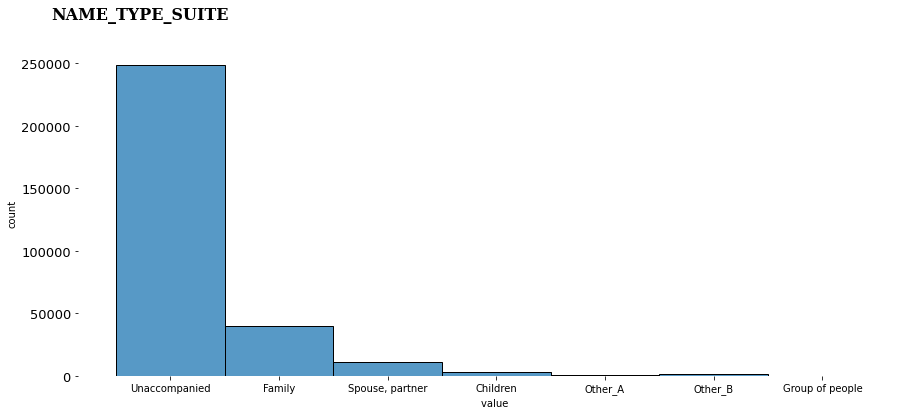

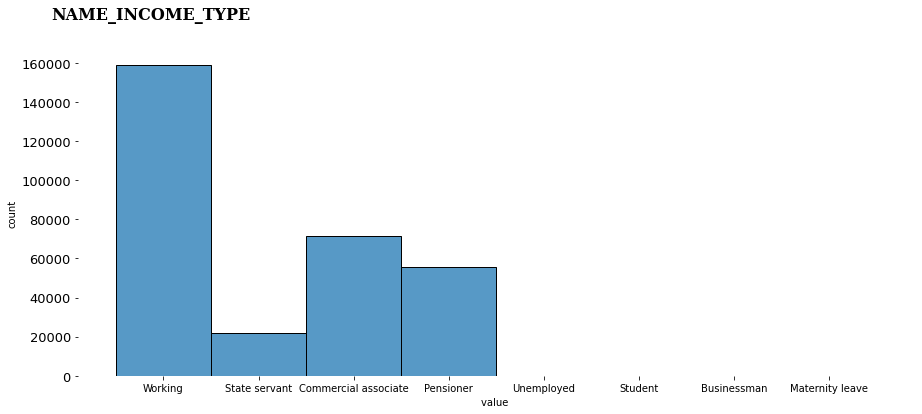

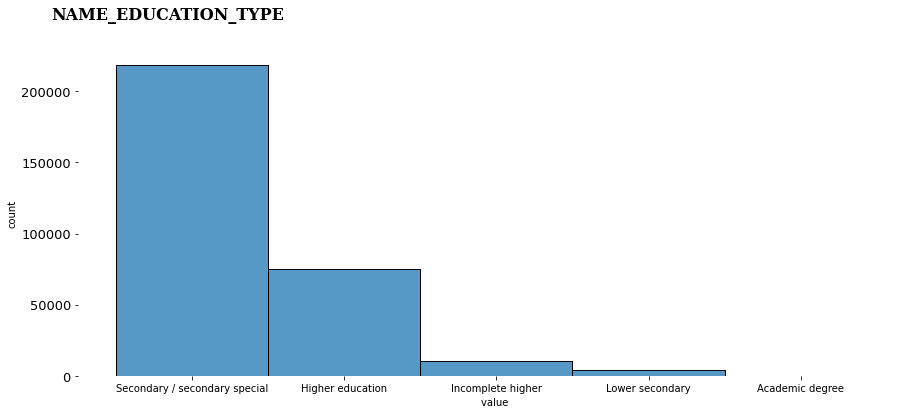

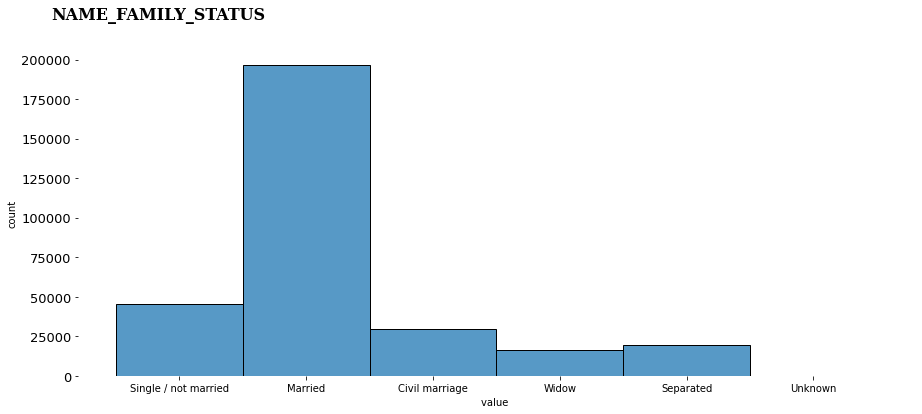

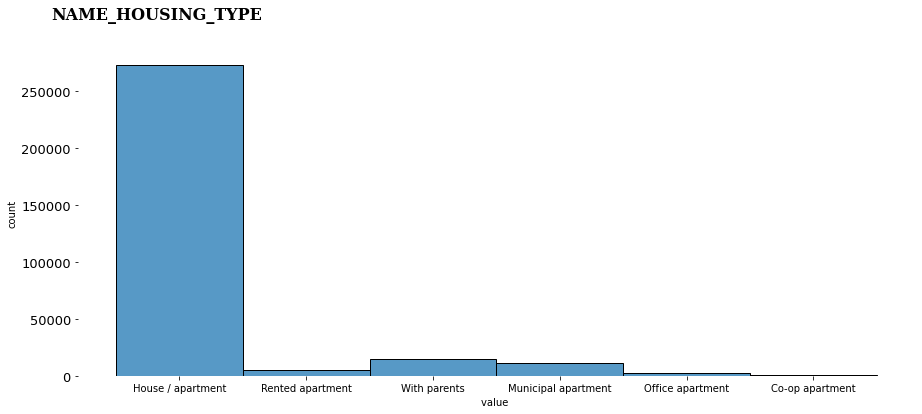

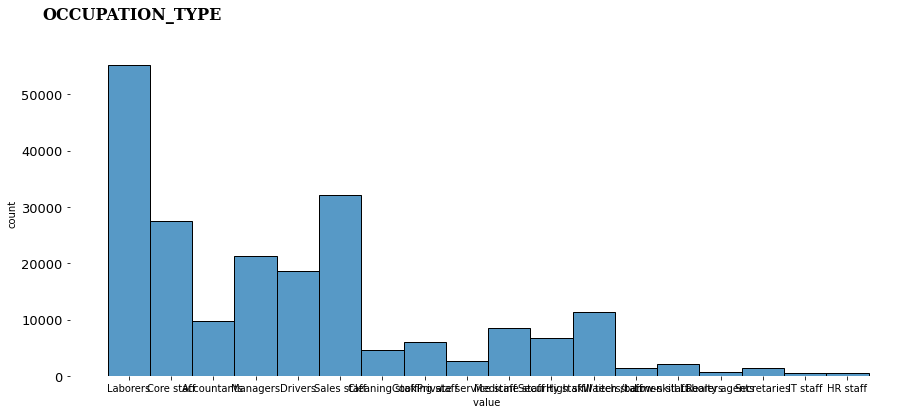

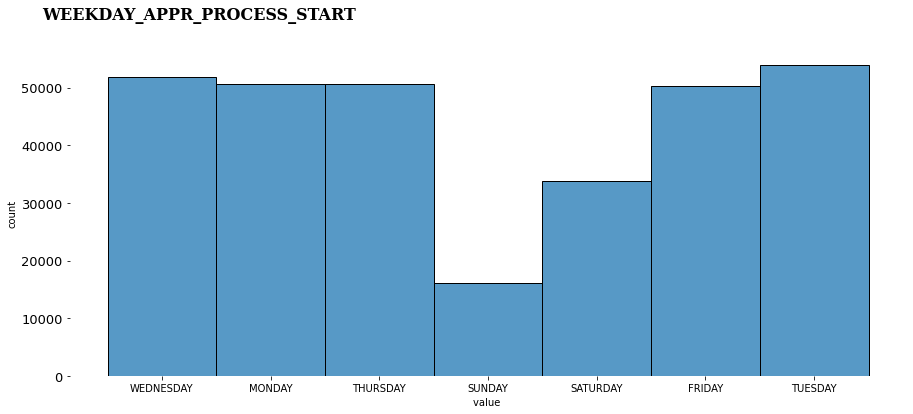

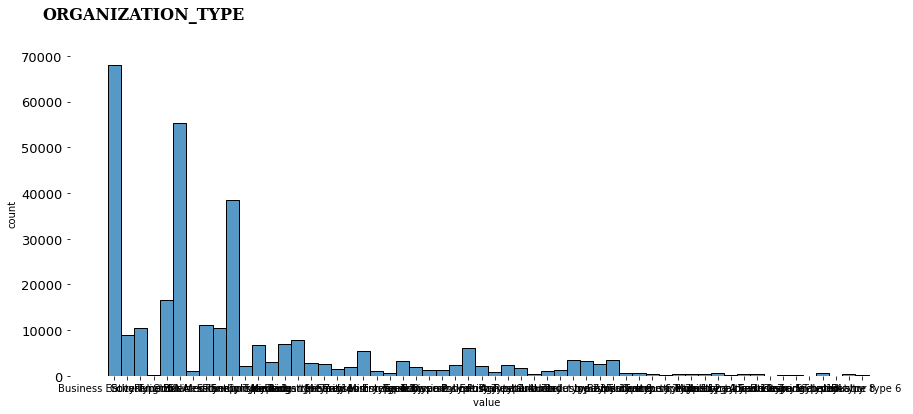

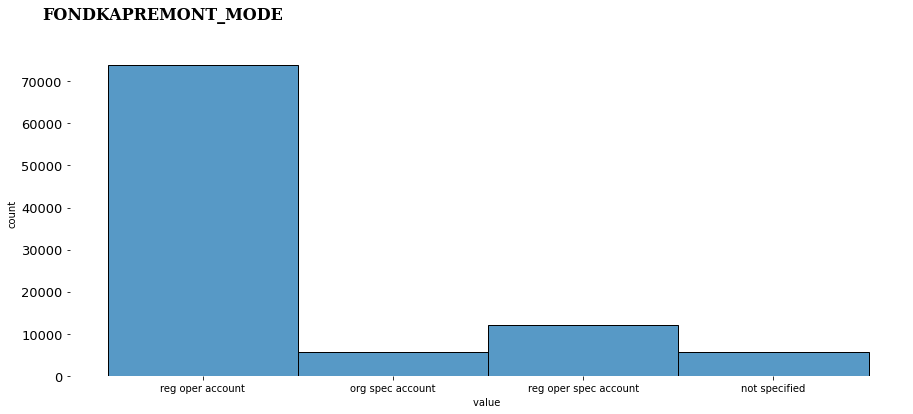

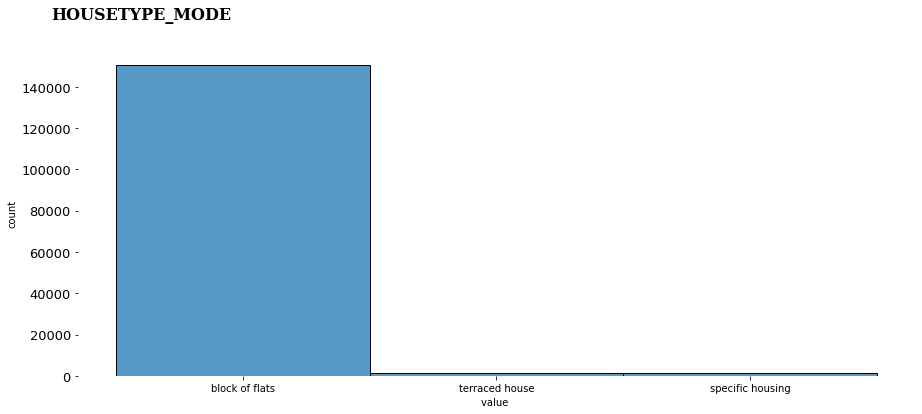

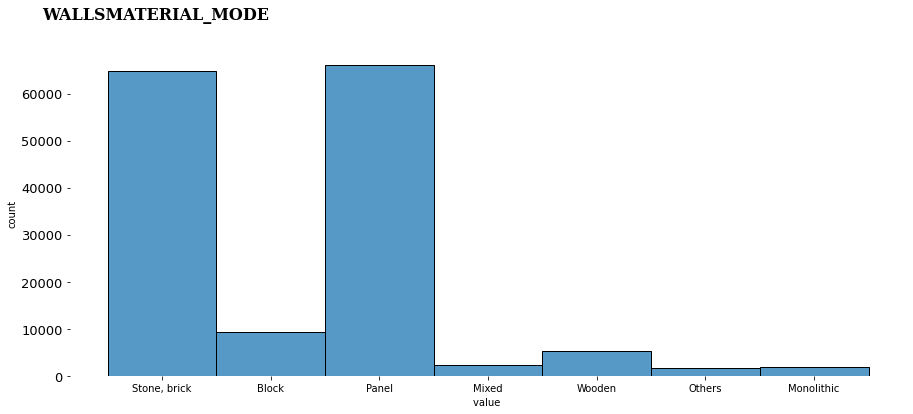

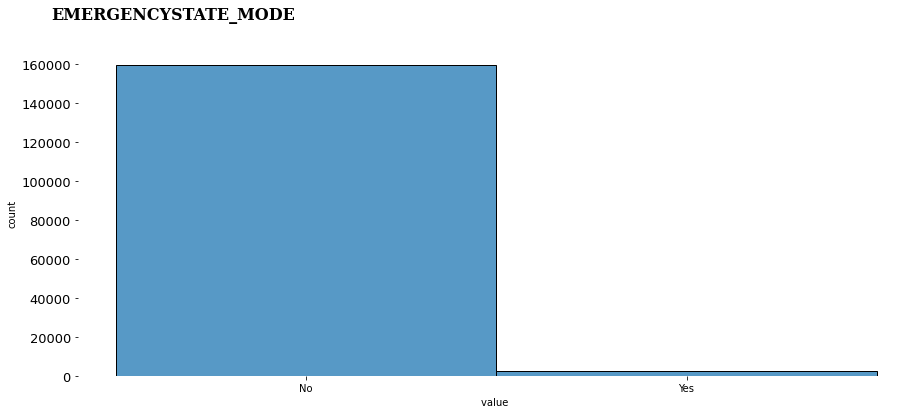

In [11]:
print("Histograms of dataset")
for h in traindf.select_dtypes("object").columns:
    if(traindf[h].nunique() < 100):
        fig, ax = plt.subplots(1,1, figsize=(15, 6))
        sns.histplot(traindf[h].dropna(), palette='Blues_r')
        fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
        plt.xlabel('value ', fontsize=10)
        plt.ylabel('count',fontsize=10)
        plt.yticks(fontsize=13)
        plt.box(False)

Histograms with Classes portions


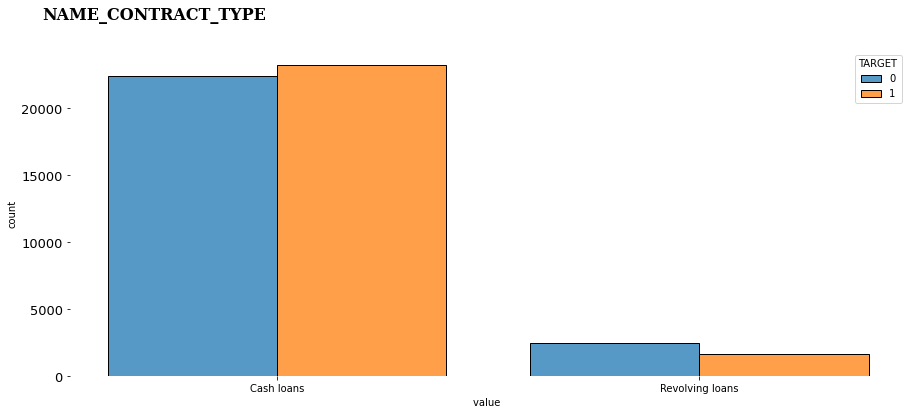

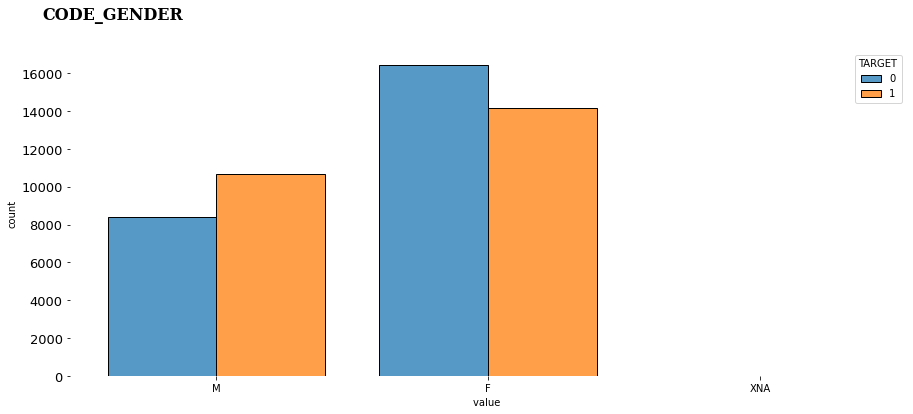

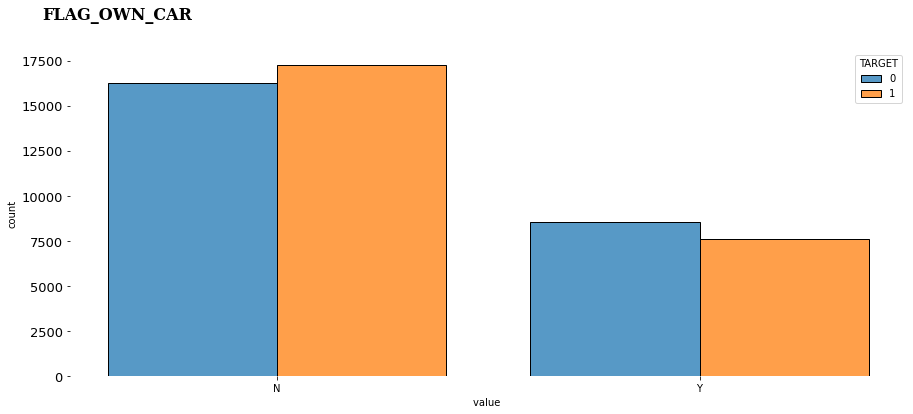

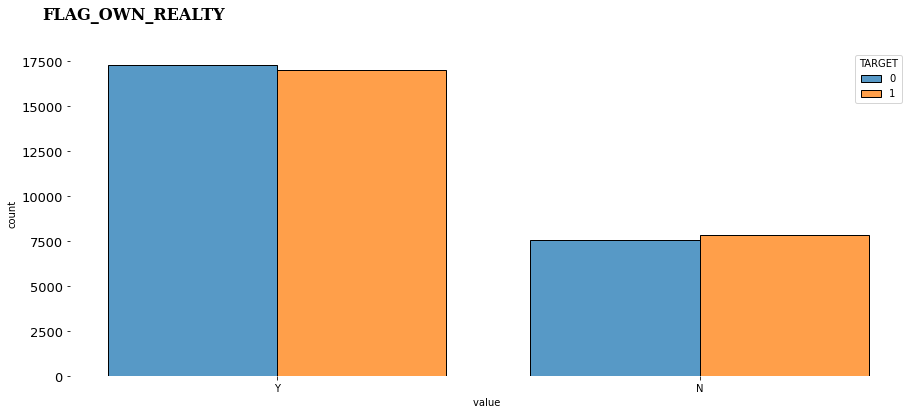

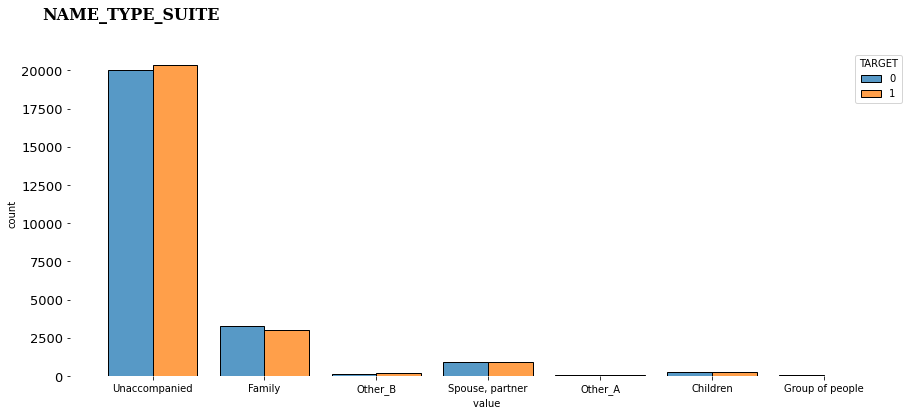

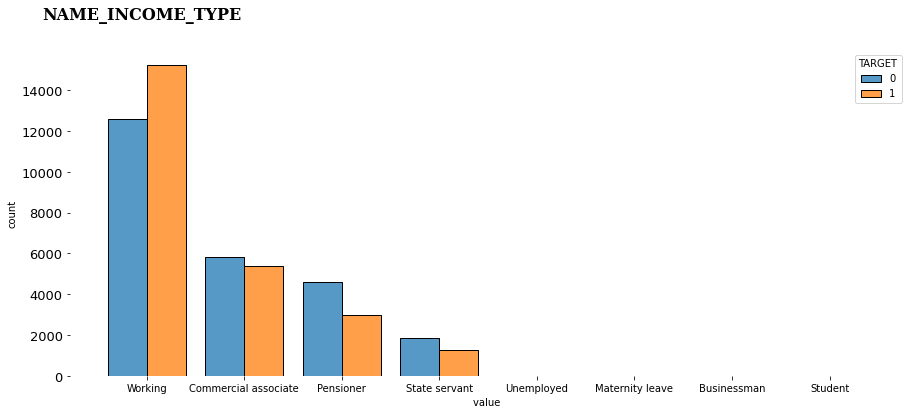

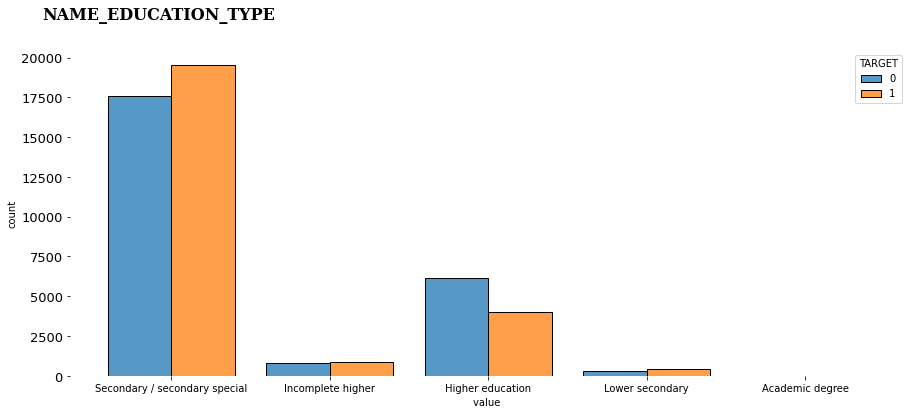

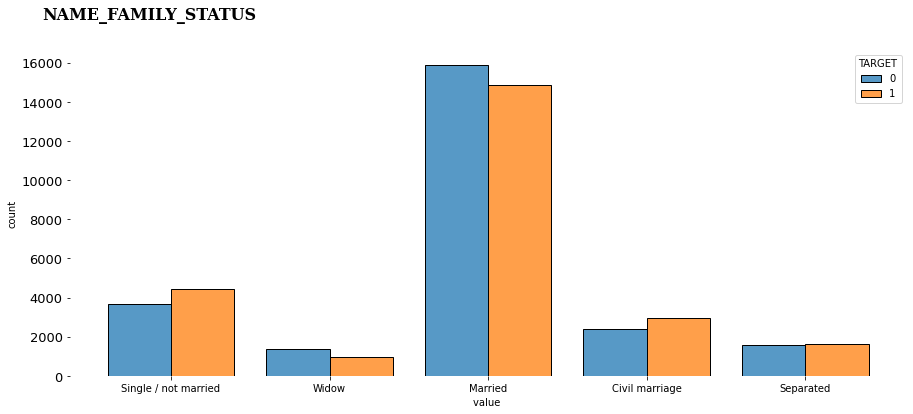

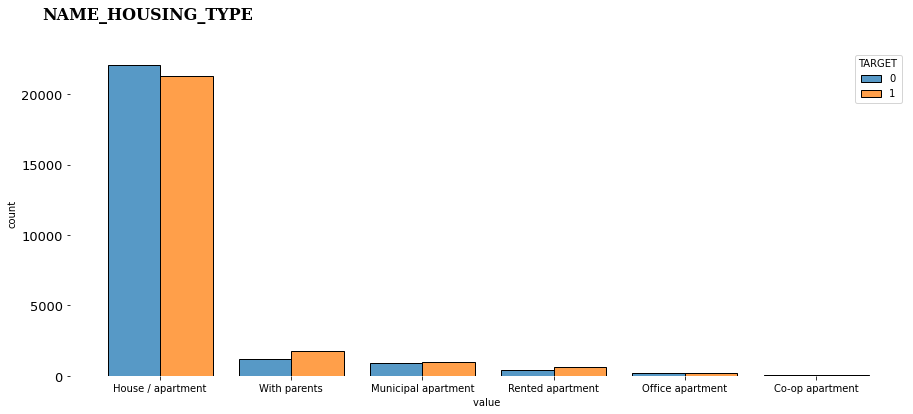

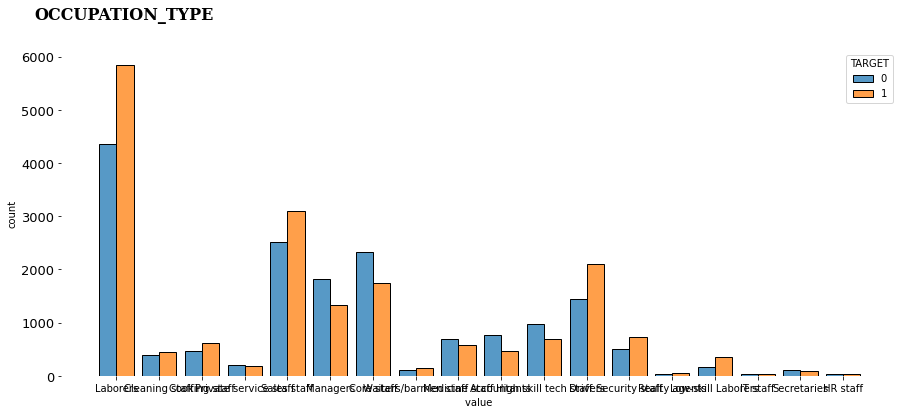

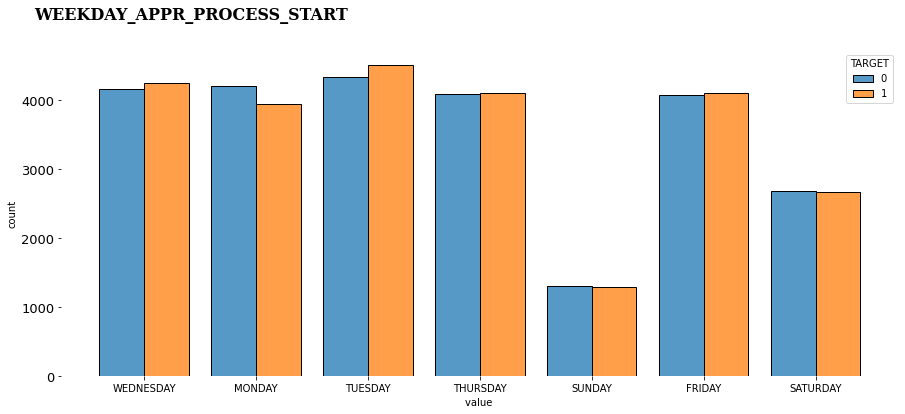

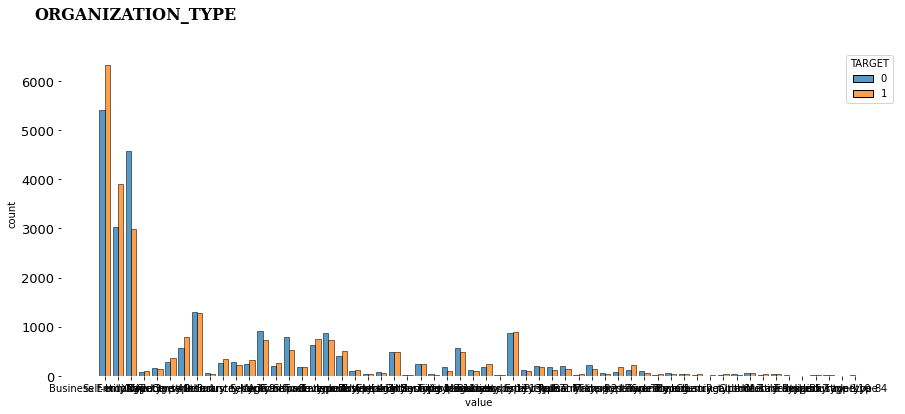

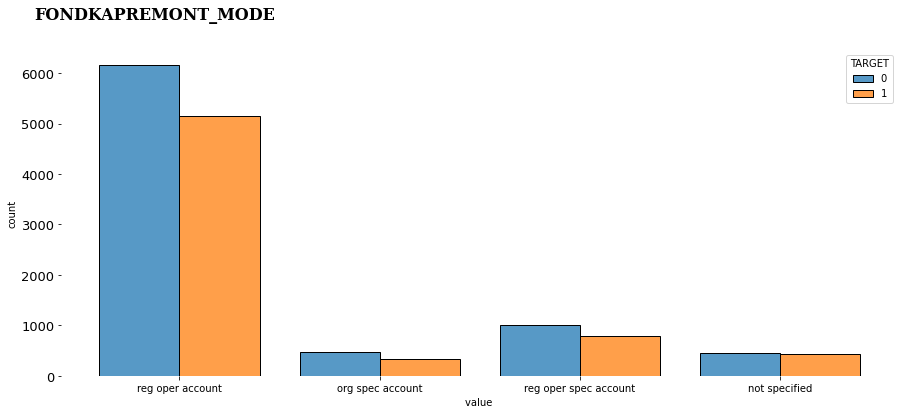

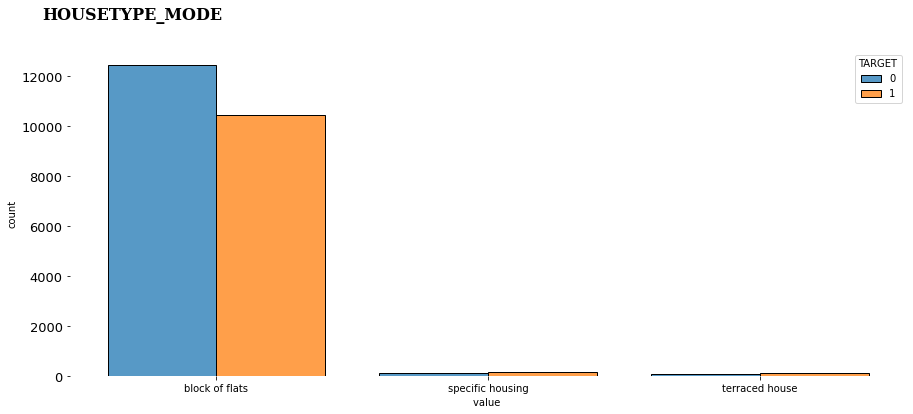

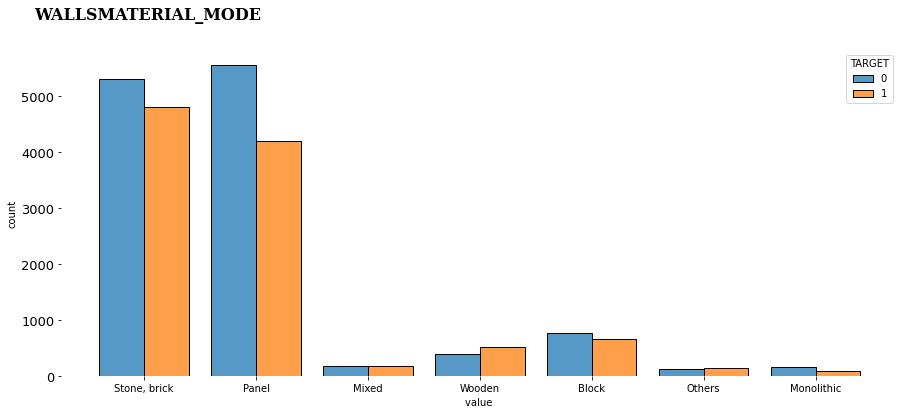

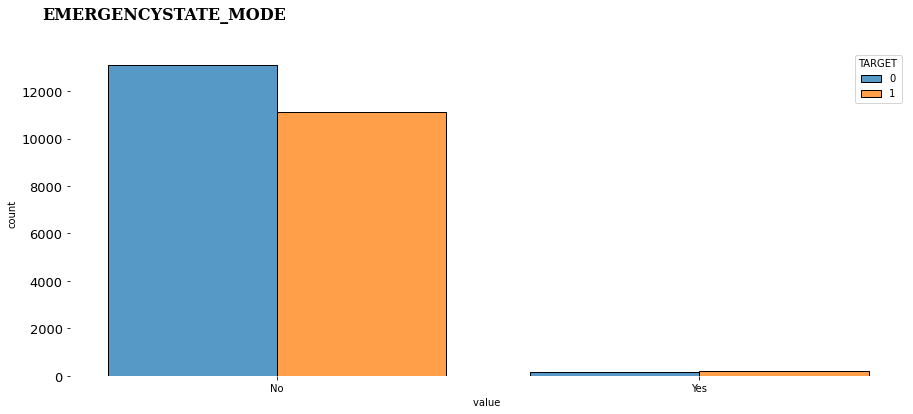

In [12]:
print("Histograms with Classes portions")
for h in traindf.select_dtypes("object").columns:
    if(traindf[h].nunique() < 100):
        fig, ax = plt.subplots(1,1, figsize=(15, 6))
        sns.histplot(x=balanceddf[h].dropna(), hue=balanceddf["TARGET"], multiple="dodge", shrink=.8)
        fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
        plt.xlabel('value ', fontsize=10)
        plt.ylabel('count',fontsize=10)
        plt.yticks(fontsize=13)
        plt.box(False)

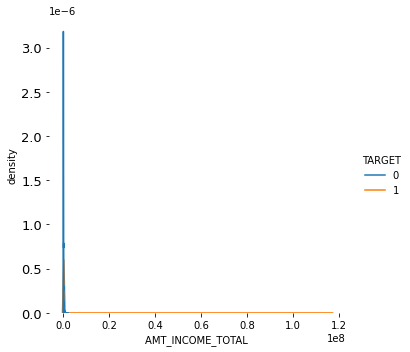

In [13]:
# Amount of total income
sns.displot(data=balanceddf, x="AMT_INCOME_TOTAL", hue="TARGET", kind="kde")
fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('AMT_INCOME_TOTAL ', fontsize=10)
plt.ylabel('density',fontsize=10)
plt.yticks(fontsize=13)
plt.box(False)

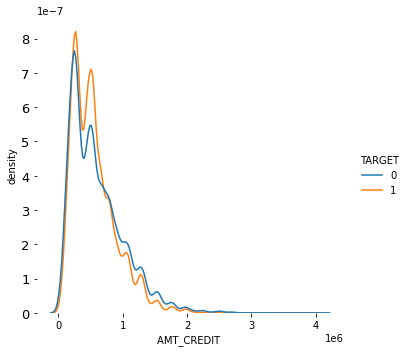

In [14]:
# Amount of credit
sns.displot(data=balanceddf, x="AMT_CREDIT", hue="TARGET", kind="kde")
fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('AMT_CREDIT ', fontsize=10)
plt.ylabel('density',fontsize=10)
plt.yticks(fontsize=13)
plt.box(False)

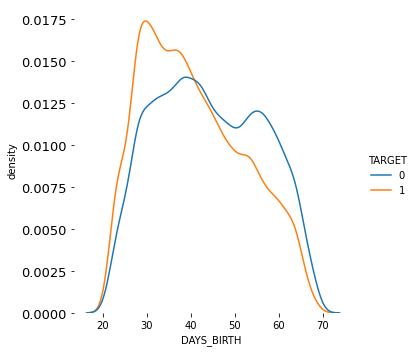

In [15]:
# Age
years = balanceddf["DAYS_BIRTH"] / -365
sns.displot(x=years, hue=balanceddf["TARGET"], kind="kde")
fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('DAYS_BIRTH ', fontsize=10)
plt.ylabel('density',fontsize=10)
plt.yticks(fontsize=13)
plt.box(False)

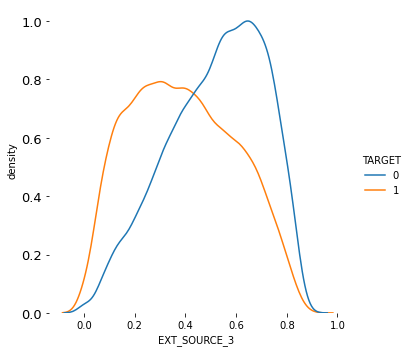

In [16]:
# External Source 3
sns.displot(x=balanceddf["EXT_SOURCE_3"], hue=balanceddf["TARGET"], kind="kde")
fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('EXT_SOURCE_3 ', fontsize=10)
plt.ylabel('density',fontsize=10)
plt.yticks(fontsize=13)
plt.box(False)

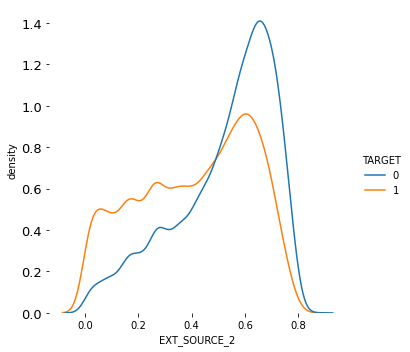

In [17]:
# External Source 2
sns.displot(x=balanceddf["EXT_SOURCE_2"], hue=balanceddf["TARGET"], kind="kde")
fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('EXT_SOURCE_2', fontsize=10)
plt.ylabel('density',fontsize=10)
plt.yticks(fontsize=13)
plt.box(False)

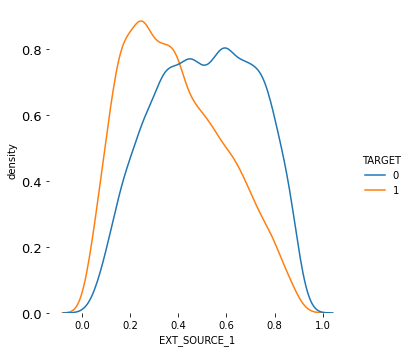

In [18]:
# External Source 1
sns.displot(x=balanceddf["EXT_SOURCE_1"], hue=balanceddf["TARGET"], kind="kde")
fig.text(0.1, 0.95, f'{h}', fontsize=16, fontweight='bold', fontfamily='serif')
plt.xlabel('EXT_SOURCE_1', fontsize=10)
plt.ylabel('density',fontsize=10)
plt.yticks(fontsize=13)
plt.box(False)

# 4- Feature Selection

In [19]:
# Find correlations
corr = traindf.corr()

In [20]:
# Select highly correlated features
high_corr = corr[((corr > 0.03) | (corr < -0.03)) & (corr < 1) ]

In [21]:
# For each feature, list its correlated feature
correlated_columns = {}
for col in high_corr.columns:
    correlated_features = high_corr.columns[(~high_corr[col].isna())].tolist()
    correlated_features = list(set(correlated_features).difference(set(correlated_columns.keys())))
    correlated_columns[col] = correlated_features

In [22]:
# From correlated features with TARGET, select their top 3 correlated features
selected_features = correlated_columns["TARGET"]
for feature in selected_features.copy():
    correlated_correlated_features = high_corr[feature].abs().sort_values(ascending=False)
#     print("_______",feature,'______')
#     print(correlated_correlated_features)
#     print("\n")
    
    features_to_select = correlated_correlated_features[correlated_correlated_features < 90][:3].index.tolist()
    selected_features.extend(features_to_select)

In [23]:
X = traindf.loc[:, np.unique(selected_features)].drop(columns="TARGET")
y = traindf.loc[:, "TARGET"]

# X_val = testdf.loc[:, np.unique(selected_features)]
# y_val = testdf.loc[:, "TARGET"] # Err column not found

# 5- Fill Missing Values

In [24]:
# Percentage of missing values
X.isna().sum() / X.shape[0] * 100

AMT_ANNUITY                     0.003902
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                 0.090403
AMT_INCOME_TOTAL                0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
APARTMENTS_MODE                50.749729
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_LAST_PHONE_CHANGE          0.000325
DAYS_REGISTRATION               0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
ELEVATORS_AVG                  53.295980
ELEVATORS_MEDI                 53.295980
ELEVATORS_MODE                 53.295980
EXT_SOURCE_1                   56.381073
EXT_SOURCE_2                    0.214626
EXT_SOURCE_3                   19.825307
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_EMP_PHONE                  0.000000
FLOORSMAX_AVG                  49.760822
FLOORSMAX_MEDI  

# Ridge Regression Filler

In [25]:
# Fill EXT_SOURCE_1 given EXT_SOURCE_2 and EXT_SOURCE_3

data = X.loc[:, ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].dropna()
x_filler = data.drop(columns="EXT_SOURCE_1")
y_filler = data["EXT_SOURCE_1"]

reg_model = Ridge(alpha=0.001,normalize=True)
reg_model.fit(x_filler, y_filler)

mask = (~(X["EXT_SOURCE_2"].isna())) & (~(X["EXT_SOURCE_3"].isna())) & (X["EXT_SOURCE_1"].isna())
x_pred = X.loc[mask,["EXT_SOURCE_2", "EXT_SOURCE_3"]]
X.loc[mask,"EXT_SOURCE_1"] = reg_model.predict(x_pred)

In [26]:
# Fill EXT_SOURCE_3 given EXT_SOURCE_2 and EXT_SOURCE_1

data = X.loc[:, ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].dropna()
x_filler = data.drop(columns="EXT_SOURCE_3")
y_filler = data["EXT_SOURCE_3"]

reg_model = Ridge(alpha=0.001,normalize=True)
reg_model.fit(x_filler, y_filler)

mask = (~(X["EXT_SOURCE_2"].isna())) & (~(X["EXT_SOURCE_1"].isna())) & (X["EXT_SOURCE_3"].isna())
x_pred = X.loc[mask,["EXT_SOURCE_2", "EXT_SOURCE_1"]]
X.loc[mask,"EXT_SOURCE_3"] = reg_model.predict(x_pred)

In [27]:
# Percentage of missings
X.isna().sum() / X.shape[0] * 100

AMT_ANNUITY                     0.003902
AMT_CREDIT                      0.000000
AMT_GOODS_PRICE                 0.090403
AMT_INCOME_TOTAL                0.000000
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
APARTMENTS_MODE                50.749729
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_ID_PUBLISH                 0.000000
DAYS_LAST_PHONE_CHANGE          0.000325
DAYS_REGISTRATION               0.000000
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
ELEVATORS_AVG                  53.295980
ELEVATORS_MEDI                 53.295980
ELEVATORS_MODE                 53.295980
EXT_SOURCE_1                   11.983636
EXT_SOURCE_2                    0.214626
EXT_SOURCE_3                   11.912419
FLAG_DOCUMENT_3                 0.000000
FLAG_DOCUMENT_6                 0.000000
FLAG_DOCUMENT_8                 0.000000
FLAG_EMP_PHONE                  0.000000
FLOORSMAX_AVG                  49.760822
FLOORSMAX_MEDI  

In [28]:
# Fill remaining missings using median
X["EXT_SOURCE_1"] = X["EXT_SOURCE_1"].fillna(X["EXT_SOURCE_1"].median())
X["EXT_SOURCE_2"] = X["EXT_SOURCE_2"].fillna(X["EXT_SOURCE_2"].median())
X["EXT_SOURCE_3"] = X["EXT_SOURCE_3"].fillna(X["EXT_SOURCE_3"].median())
X["DAYS_LAST_PHONE_CHANGE"] = X["DAYS_LAST_PHONE_CHANGE"].fillna(X["DAYS_LAST_PHONE_CHANGE"].median())

# Fill remaining missings using mean
X["AMT_ANNUITY"] = X["AMT_ANNUITY"].fillna(X["AMT_ANNUITY"].mean())
X["AMT_GOODS_PRICE"] = X["AMT_GOODS_PRICE"].fillna(X["AMT_GOODS_PRICE"].mean())
X["AMT_REQ_CREDIT_BUREAU_YEAR"] = X["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(X["AMT_REQ_CREDIT_BUREAU_YEAR"].mean())


# Large portion of missing values -> better to drop column
X = X.drop(columns=[
    "FLOORSMIN_MODE",
    "FLOORSMIN_MEDI",
    "FLOORSMIN_AVG",
    "FLOORSMAX_MODE",
    "FLOORSMAX_MEDI",
    "FLOORSMAX_AVG",
    'APARTMENTS_MODE',
    'DEF_30_CNT_SOCIAL_CIRCLE',
    'DEF_60_CNT_SOCIAL_CIRCLE',
    'ELEVATORS_AVG',
    'ELEVATORS_MEDI',
    'ELEVATORS_MODE',
    'FLOORSMAX_AVG',
    'FLOORSMAX_MEDI',
    'FLOORSMAX_MODE',
    'FLOORSMIN_AVG',
    'FLOORSMIN_MEDI',
    'FLOORSMIN_MODE',
    'LIVINGAREA_AVG',
    'LIVINGAREA_MEDI',
    'LIVINGAREA_MODE',
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
    'OWN_CAR_AGE',
    'TOTALAREA_MODE'
])

In [29]:
# Percentage of missings
X.isna().sum() / X.shape[0] * 100

AMT_ANNUITY                    0.0
AMT_CREDIT                     0.0
AMT_GOODS_PRICE                0.0
AMT_INCOME_TOTAL               0.0
AMT_REQ_CREDIT_BUREAU_YEAR     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_ID_PUBLISH                0.0
DAYS_LAST_PHONE_CHANGE         0.0
DAYS_REGISTRATION              0.0
EXT_SOURCE_1                   0.0
EXT_SOURCE_2                   0.0
EXT_SOURCE_3                   0.0
FLAG_DOCUMENT_3                0.0
FLAG_DOCUMENT_6                0.0
FLAG_DOCUMENT_8                0.0
FLAG_EMP_PHONE                 0.0
LIVE_CITY_NOT_WORK_CITY        0.0
LIVE_REGION_NOT_WORK_REGION    0.0
REGION_POPULATION_RELATIVE     0.0
REGION_RATING_CLIENT           0.0
REGION_RATING_CLIENT_W_CITY    0.0
REG_CITY_NOT_LIVE_CITY         0.0
REG_CITY_NOT_WORK_CITY         0.0
REG_REGION_NOT_LIVE_REGION     0.0
dtype: float64

,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_EMP_PHONE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,TARGET
AMT_ANNUITY,1.00,0.77,0.77,0.19,-0.01,0.01,-0.10,0.01,-0.06,0.04,0.10,0.13,0.03,0.10,-0.07,0.13,0.10,0.01,0.07,0.12,-0.13,-0.14,-0.01,0.00,0.04,-0.01
AMT_CREDIT,0.77,1.00,0.99,0.16,-0.05,-0.06,-0.07,-0.01,-0.07,0.01,0.13,0.13,0.04,0.10,-0.05,0.08,0.07,0.00,0.05,0.10,-0.10,-0.11,-0.03,-0.02,0.02,-0.03
AMT_GOODS_PRICE,0.77,0.99,1.00,0.16,-0.05,-0.05,-0.06,-0.01,-0.08,0.01,0.14,0.14,0.05,0.07,-0.05,0.08,0.06,-0.00,0.05,0.10,-0.10,-0.11,-0.03,-0.02,0.03,-0.04
AMT_INCOME_TOTAL,0.19,0.16,0.16,1.00,0.01,0.03,-0.06,0.01,-0.02,0.03,0.03,0.06,-0.03,-0.02,-0.05,0.07,0.06,0.01,0.06,0.07,-0.09,-0.09,0.00,0.01,0.03,-0.00
AMT_REQ_CREDIT_BUREAU_YEAR,-0.01,-0.05,-0.05,0.01,1.00,-0.07,0.05,-0.03,-0.11,-0.02,-0.01,-0.02,-0.07,0.04,0.01,-0.02,-0.05,-0.01,-0.02,0.00,0.01,0.01,-0.00,-0.01,-0.02,0.02
DAYS_BIRTH,0.01,-0.06,-0.05,0.03,-0.07,1.00,-0.62,0.27,0.08,0.33,-0.38,-0.09,-0.19,0.11,-0.41,0.11,0.62,0.16,0.07,-0.03,0.01,0.01,0.18,0.24,0.07,0.08
DAYS_EMPLOYED,-0.10,-0.07,-0.06,-0.06,0.05,-0.62,1.00,-0.27,0.02,-0.21,0.16,-0.02,0.10,-0.25,0.60,-0.12,-1.00,-0.22,-0.10,-0.00,0.03,0.03,-0.09,-0.25,-0.04,-0.04
DAYS_ID_PUBLISH,0.01,-0.01,-0.01,0.01,-0.03,0.27,-0.27,1.00,0.09,0.10,-0.10,-0.05,-0.12,0.05,-0.18,0.02,0.27,0.06,0.03,-0.00,-0.01,-0.01,0.08,0.10,0.03,0.05
DAYS_LAST_PHONE_CHANGE,-0.06,-0.07,-0.08,-0.02,-0.11,0.08,0.02,0.09,1.00,0.06,-0.12,-0.20,-0.07,-0.06,0.03,-0.01,-0.02,0.02,0.02,-0.04,0.03,0.03,0.05,0.05,0.04,0.06
DAYS_REGISTRATION,0.04,0.01,0.01,0.03,-0.02,0.33,-0.21,0.10,0.06,1.00,-0.13,-0.06,-0.10,0.03,-0.14,0.06,0.21,0.07,0.03,-0.05,0.08,0.07,0.06,0.10,0.03,0.04


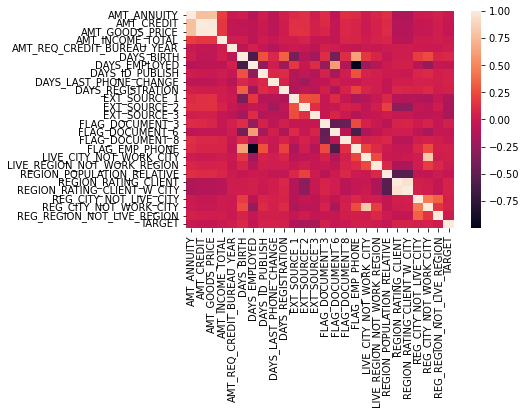

In [30]:
%matplotlib inline


corr = pd.concat((X,y), axis=1).corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

In [31]:
X.head().T

,0,1,2,3,4
AMT_ANNUITY,24700.500000,3.569850e+04,6750.000000,29686.500000,21865.500000
AMT_CREDIT,406597.500000,1.293502e+06,135000.000000,312682.500000,513000.000000
AMT_GOODS_PRICE,351000.000000,1.129500e+06,135000.000000,297000.000000,513000.000000
AMT_INCOME_TOTAL,202500.000000,2.700000e+05,67500.000000,135000.000000,121500.000000
AMT_REQ_CREDIT_BUREAU_YEAR,1.000000,0.000000e+00,0.000000,1.899974,0.000000
DAYS_BIRTH,-9461.000000,-1.676500e+04,-19046.000000,-19005.000000,-19932.000000
DAYS_EMPLOYED,-637.000000,-1.188000e+03,-225.000000,-3039.000000,-3038.000000
DAYS_ID_PUBLISH,-2120.000000,-2.910000e+02,-2531.000000,-2437.000000,-3458.000000
DAYS_LAST_PHONE_CHANGE,-1134.000000,-8.280000e+02,-815.000000,-617.000000,-1106.000000
DAYS_REGISTRATION,-3648.000000,-1.186000e+03,-4260.000000,-9833.000000,-4311.000000


# 6- Preprocessing

In [32]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [33]:
numeric_columns = [
    "AMT_ANNUITY",
    "AMT_CREDIT",
    "AMT_GOODS_PRICE",
    "AMT_INCOME_TOTAL",
    "AMT_REQ_CREDIT_BUREAU_YEAR",
    "REGION_POPULATION_RELATIVE",
    "EXT_SOURCE_3",
    "EXT_SOURCE_2",
    "EXT_SOURCE_1",
    "DAYS_REGISTRATION",
    "DAYS_LAST_PHONE_CHANGE",
    "DAYS_ID_PUBLISH",
    "DAYS_EMPLOYED",
    "DAYS_BIRTH"
]

In [34]:
# Scale data
sc_train = StandardScaler()
sc_test = StandardScaler()

X_train.loc[:,numeric_columns] = sc_train.fit_transform(X_train.loc[:,numeric_columns])
X_test.loc[:,numeric_columns] = sc_test.fit_transform(X_test.loc[:,numeric_columns])

# Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model, Sequential

In [ ]:
model = Sequential()
model.add(Dense(64,input_shape=(X_train.shape[1],)))

model.add(Dense(128))
model.add(LeakyReLU())
model.add(BatchNormalization())

model.add(Dense(256))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(256))
model.add(LeakyReLU())
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="binary_crossentropy", metrics=[tf.keras.metrics.AUC()], optimizer=opt)
model.summary()

In [ ]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=tf.math.exp(-0.1),
    patience=2,
    verbose=1,
    mode="min",
    min_lr=0.0004,
)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), verbose=1, batch_size=128,
          epochs=10, 
          callbacks=[reduce_lr]
         )

In [ ]:
# Training & Validation <> Loss & Accuracy

train_metric_name = model.compiled_metrics._metrics[0][0].name
val_metric_name = "val_" + train_metric_name

%matplotlib inline
acc = np.array(history.history[train_metric_name])
val_acc = np.array(history.history[val_metric_name])
loss = np.array(history.history['loss'])
val_loss = np.array(history.history['val_loss'])

epochs = np.arange(10)

plt.plot(epochs, acc*100, 'r', label='Training AUC')
plt.plot(epochs, val_acc*100, 'b', label='Validation AUC')
plt.scatter(epochs[val_acc.argmax()], val_acc.max()*100, color='green', s=70)
plt.title('Training and validation AUC')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.scatter(epochs[val_loss.argmin()], val_loss.min(), color='green', s=70)
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
y_train_pred = model.predict(X_train) > 0.5
y_test_pred = model.predict(X_test) > 0.5

print(model)
print('Train Monitor')
print(classification_report(y_train, y_train_pred))
print('\n')

print('Test Monitor')
print(classification_report(y_test, y_test_pred))
print("\n\n")

print('Roc_auc score')
print(roc_auc_score(y_test, y_test_pred))
print('\n')


print('Confusion matrix')
print(confusion_matrix(y_test, y_test_pred))

# Submit Evaluation on Test set

In [ ]:
ids = testdf.loc[:, "SK_ID_CURR"]
X = testdf.loc[:, X_train.columns]

# Fill EXT_SOURCE_1 given EXT_SOURCE_2 and EXT_SOURCE_3


data = X.loc[:, ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].dropna()
x_filler = data.drop(columns="EXT_SOURCE_1")
y_filler = data["EXT_SOURCE_1"]

reg_model = Ridge(alpha=0.001,normalize=True)
reg_model.fit(x_filler, y_filler)

mask = (~(X["EXT_SOURCE_2"].isna())) & (~(X["EXT_SOURCE_3"].isna())) & (X["EXT_SOURCE_1"].isna())
x_pred = X.loc[mask,["EXT_SOURCE_2", "EXT_SOURCE_3"]]
X.loc[mask,"EXT_SOURCE_1"] = reg_model.predict(x_pred)

# Fill EXT_SOURCE_3 given EXT_SOURCE_2 and EXT_SOURCE_1

data = X.loc[:, ["EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3"]].dropna()
x_filler = data.drop(columns="EXT_SOURCE_3")
y_filler = data["EXT_SOURCE_3"]

reg_model = Ridge(alpha=0.001,normalize=True)
reg_model.fit(x_filler, y_filler)

mask = (~(X["EXT_SOURCE_2"].isna())) & (~(X["EXT_SOURCE_1"].isna())) & (X["EXT_SOURCE_3"].isna())
x_pred = X.loc[mask,["EXT_SOURCE_2", "EXT_SOURCE_1"]]
X.loc[mask,"EXT_SOURCE_3"] = reg_model.predict(x_pred)

X["EXT_SOURCE_1"] = X["EXT_SOURCE_1"].fillna(X["EXT_SOURCE_1"].median())
X["EXT_SOURCE_2"] = X["EXT_SOURCE_2"].fillna(X["EXT_SOURCE_2"].median())
X["EXT_SOURCE_3"] = X["EXT_SOURCE_3"].fillna(X["EXT_SOURCE_3"].median())
X["DAYS_LAST_PHONE_CHANGE"] = X["DAYS_LAST_PHONE_CHANGE"].fillna(X["DAYS_LAST_PHONE_CHANGE"].median())

# Fill remaining missings using mean
X["AMT_ANNUITY"] = X["AMT_ANNUITY"].fillna(X["AMT_ANNUITY"].mean())
X["AMT_GOODS_PRICE"] = X["AMT_GOODS_PRICE"].fillna(X["AMT_GOODS_PRICE"].mean())
X["AMT_REQ_CREDIT_BUREAU_YEAR"] = X["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(X["AMT_REQ_CREDIT_BUREAU_YEAR"].mean())


X.loc[:,numeric_columns] = sc_test.fit_transform(X.loc[:,numeric_columns])

In [ ]:
output = model.predict(X)[:,0]

In [ ]:
evaluation = pd.concat((ids, pd.Series(output,name="TARGET")),axis=1)

In [ ]:
evaluation.to_csv("submission.csv", index=False)